## Normal and Inferior Goods

#### Definition of Normal/Inferior Goods
Consider a utility maximization problem: $\max_{x,y} u(x,y)$ s.t. $p_xx+p_yy \leq I$, and let the solution of the problem (i.e., Marshallian demand) as $x(p_x,p_y,I)$ and $y(p_x,p_y,I)$. 
* If $\frac{\partial x(p_x,p_y,I)}{\partial I}>0$, then the good x is a normal good.
* If $\frac{\partial x(p_x,p_y,I)}{\partial I}<0$, then the good x is an inferior good.


In the following, I plot examples of normal/inferior goods. 
Here, I focus on the following class of utility function: $u(x, y) = x^a/a + y^b/b$. 

It is worthnoting that this becomes 
* a CES utility function if $a=b<1$, and 
* a quasi-linear utility if b=1 (or a=1). 

Since there is no income effect under a quasi-linear utility function (i.e., $\frac{\partial x(p_x,p_y,I)}{\partial I}=0$ since all the income effect is absorved by change in y if $b=1$), we can guess that we can let x as an inferior good by setting b>1. 

First, I plot indifference curves of the utility function with $a<1$ and $b>1$. 

In [1]:
# Preparing graphs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

%matplotlib inline

l1 = 0.0001
u1 = 3.5
x1 = np.arange(l1, u1, 0.01)
x2 = np.arange(l1, u1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

In [2]:
def utl3(x1, x2, a, b):
    return (x1**a)/a + (x2**b)/b

def MRS3(x1, x2, a, b):
    return (x1**(a-1))/(x2**(b-1))

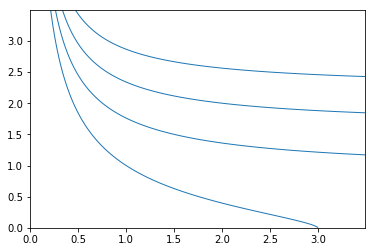

In [3]:
V3 = utl3(X1, X2, -1, 1.5)
plt.figure()
x = np.arange(1, 3, 0.5)
plt.contour(X1, X2, V3, levels = utl3(x, x, -1, 1.5), linewidths = 1, colors = 'C0', linestyles='solid');

It is still hard to see whether this represents inferior goods. Therefore, I derive the Marshallian demand along with corresponding budget constraints. In order to do that, I solve the following system of equations: 
\begin{align*}
(MRS=)\frac{x^{a-1}}{y^{b-1}} &=\frac{p_x}{p_x} \\ 
p_xx+p_yy &= I
\end{align*}
where the first equation is the tangency condition and the second equation is the budget constraint. 

In [4]:
def FOC_max(x):
    # parameters are passed like as global variables
    val = np.empty((2)) # We need to specify 'val' as an array, but not a list.
    val[0] = (x[0]**(a-1))/ (x[1]**(b-1)) - slp
    val[1] = IoverPy -  slp*x[0] - x[1]
    return val

Here, I use `fsolve` to solve the system of equation defined above. 
* Note: Parameters are passed even without explicitly defining them as global variables.

In [5]:
a = -1
slp = 1
b = 1
IoverPy = 2

res = fsolve(FOC_max, np.array([float(1),float(1)] )) 
# The initial value must be a np.arrray, not a list. 
# Without making the initial value as a floating point number,
# you will see an error message related to a power in the function 
res

array([ 1.,  1.])

In the following, I calculate the optimal consumption bundle for different levels of b and different levels of I, and draw the indifference curves corresponding to each optimal consumption bundle. 

#### Overview of the following part 
    for each b  
        for each I (income level)  
            solve system of equation and plot the point  
        end  
        plot contours  
    end

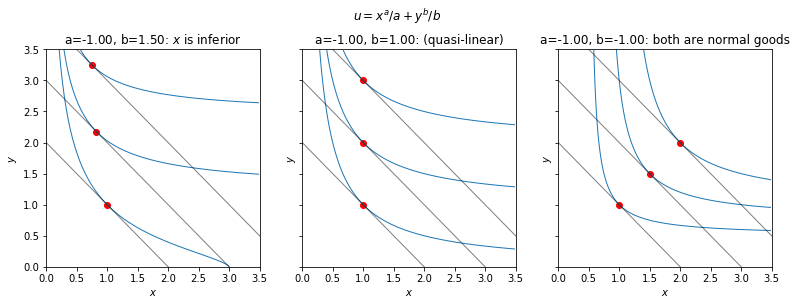

In [6]:
a = -1
slp = 1
bs = [1.5, 1, -1] # Different b's are defined to iterate through them in the following for-loop. 


fig, axes = plt.subplots(1,3,figsize=(13, 4),
                         sharex= True, #sharing x axis properties such as xlim, xticks
                         sharey= True) #sharing y axis 

ttls = [r'$x$ is inferior', '(quasi-linear)', 'both are normal goods']

plt.suptitle(r'$u=x^a/a + y^b/b$', va = 'baseline')
for b, ax, ttl in zip(bs, axes, ttls):
    plt.sca(ax)
    plt.xlim(0,3.5)
    plt.ylim(0,3.5)
    V3 = utl3(X1, X2, -1, b)
    
    x_lev1 = [] #This will be used to adjust contour levels
    x_lev2 = [] #This will be used to adjust contour levels
    for IoverPy in [2,3,4]:
        # Calculate the tangent point
        x_tan = fsolve(FOC_max, np.array([float(1),float(1)] )) 
        plt.scatter(x_tan[0],x_tan[1], color = 'red')
        # Draw the budget line around the tangent point
        tempx = np.arange(x_tan[0]-3, x_tan[0] + 3, 0.01)
        tempy = -slp*tempx + x_tan[1] + x_tan[0]*slp
        plt.plot(tempx, tempy, linestyle = 'solid', linewidth = 1,color = 'k', alpha = 0.5)
        # Save tangent points to use them later
        x_lev1.append(x_tan[0])
        x_lev2.append(x_tan[1])
    
    # Until now, x_lev1 is just a list, which looks like a vector or a matrix but cannot be used like as a vector in Matlab.
    # We need to make it to array, to use it like as a vector in Matlab
    x_lev1 = np.array(x_lev1)
    x_lev2 = np.array(x_lev2)
    plt.contour(X1, X2, V3, levels = utl3(x_lev1, x_lev2, -1, b), linewidths = 1, colors = 'C0', linestyles='solid')
    #plt.scatter(x_lev1,x_lev2, color = 'red')
    plt.title(r'a={:02.2f}'.format(a) + r', b={:02.2f}: '.format(b) + ttl)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
fig.savefig('inferior_and_normal_goods.png')      

We can see that in the left panel, the level of x is decreasing as I increases. In the center panel, we can see that all the income effect is absorved by the change in the amount of y, so the no effects on x. In the right panel, both goods are increasing in the income level. 

### Total Effect, Substitution Effect, and Income Effect
In the following, I plot decomposition of the substitution effect and the income effect. First, I consider such decomposition under the Cobb-Douglas utility function,  $u(x,y)=x^{\alpha}y^{\beta}$. Suppose that $I=12$, $p_y=6$, and the price of good x changes from $p_x=6$ to $p_x^{\prime}=3$. 

Now, the Marshallian demand (the solution of the utility maximization problem) is derived by solving
\begin{align*}
(MRS=)\frac{ay}{bx} &=\frac{p_x}{p_x}, \\ 
p_xx+p_yy &= I
\end{align*}

and the Hicksian demand (the solution of the expenditure minimization problem) is derived by solving
\begin{align*}
(MRS=)\frac{ay}{bx} &=\frac{p_x}{p_x}, \\ 
x^{\alpha}y^{\beta} &= \underline{u}
\end{align*}

In [7]:
def utl1(x1, x2, a, b):
    return (x1**a)*(x2**b)

def MRS1(x1, x2, a, b):
    return (a*x2)/(b*x1)

In [8]:
I = 12
py = 6
px_old = 6
px_new = 3
IoverPy = I/py
slp_old = px_old/py
slp_new = px_new/py

In [9]:
def FOC_max1(x):
    # parameters are passed like as global variables
    val = np.empty((2)) # We need to specify 'val' as an array, but not a list.
    val[0] = MRS1(x[0], x[1], a, b) - slp
    val[1] = IoverPy -  slp*x[0] - x[1]
    return val

def FOC_min1(x):
    val = np.empty((2))
    val[0] = MRS1(x[0], x[1], a, b) - slp
    val[1] = utl1(x[0], x[1], a, b) - u_bar
    return val

In order to examine effects of the price change (from $p_x$ to $p_x^{\prime}$), we derive 
- the optimal consumption bundle (Marshallian) under old prices
- the optimal consumption bundle (Marshallian) under new prices
- the Hicksian demand keeping the same utility level as the old consumption bundle under the new prices

In [10]:
a=2/4
b=2/4
slp = slp_old
x_old = fsolve(FOC_max1, np.array([float(0.1),float(1.5)] )) 
slp = slp_new
x_new = fsolve(FOC_max1, np.array([float(1),float(1)] )) 

u_bar = utl1(x_old[0], x_old[1], a, b)
x_comp = fsolve(FOC_min1, np.array([float(1),float(1)] )) 


Now, we can plot those consumption bundles and decompose the effects of the price change as follows. 



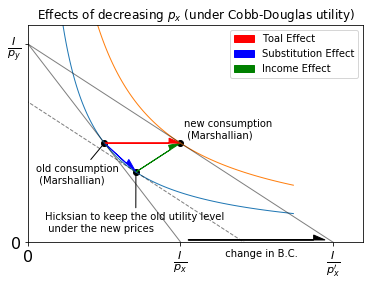

In [11]:
ann = 1

V1 = utl1(X1, X2, a, b)

fig = plt.figure()
plt.xlim(0,1.1*IoverPy/slp_new)
plt.ylim(0,1.1*IoverPy)
plt.xticks([0, IoverPy/slp_old, IoverPy/slp_new ], ['0',r'$\frac{I}{p_x}$',  r'$\frac{I}{p_x^{\prime}}$'], fontsize=16, rotation=0)
plt.yticks([0, IoverPy], ['0', r'$\frac{I}{p_y}$'], fontsize=16, rotation=0)
#plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14)
plt.title(r'Effects of decreasing $p_x$ (under Cobb-Douglas utility)')

x_lev1 = np.array([x_old[0], x_new[0]])
x_lev2 = np.array([x_old[1], x_new[1]])
cnt = plt.contour(X1, X2, V1, levels = utl1(x_lev1, x_lev2, a, b), linewidths = 1, 
            colors = ['C0', 'C1'],
            linestyles='solid', 
            label = ['U_{old}', 'U_{new}'])

plt.scatter(x_old[0], x_old[1], color = 'k', label = '$x_{old}$')
plt.scatter(x_new[0], x_new[1], color = 'k', label = '$x_{new}$')
plt.scatter(x_comp[0], x_comp[1], color = 'k', label = '$x_{comp}$')

arr1=plt.arrow(x_old[0], x_old[1], x_comp[0] - x_old[0], x_comp[1] - x_old[1],
          head_width = 0.1, length_includes_head = True,shape = 'right',color = 'b')
arr2 = plt.arrow(x_comp[0], x_comp[1], x_new[0] - x_comp[0], x_new[1] - x_comp[1], 
          head_width = 0.1, length_includes_head = True,shape = 'right',color = 'g')
arr3 = plt.arrow(x_old[0], x_old[1], x_new[0] - x_old[0], x_new[1] - x_old[1], 
          head_width = 0.1, length_includes_head = True,shape = 'right',color = 'r')
arr4 = plt.arrow(IoverPy/slp_old + 0.1, 0.02, IoverPy/slp_new -IoverPy/slp_old - 0.2, 0, 
          head_width = 0.1, length_includes_head = True,shape = 'right',color = 'k')
plt.text( IoverPy/slp_old + 0.5, -0.15, '  change in B.C.')
if (ann ==1): 
    plt.annotate('new consumption \n (Marshallian)', x_new + 0.05)
    plt.annotate('old consumption \n (Marshallian)', x_old, xytext = x_old - [0.9, 0.4], arrowprops=dict(arrowstyle='-'))
    plt.annotate('Hicksian to keep the old utility level \n under the new prices', x_comp, xytext = x_comp - [1.2, 0.6], arrowprops=dict(arrowstyle='-'))



for x_tan, slp, col, lnstl in zip([x_old,x_new, x_comp], [slp_old, slp_new, slp_new], ['k', 'k', 'k'], ['solid','solid','dashed']):
    tempx = np.arange(x_tan[0]-3, x_tan[0] + 3, 0.01)
    tempy = -slp*tempx + x_tan[1] + x_tan[0]*slp
    plt.plot(tempx, tempy, linestyle = lnstl, linewidth = 1,color = col, alpha = 0.5)
    
plt.legend([arr3, arr1, arr2], ['Toal Effect', 'Substitution Effect','Income Effect']);
fig.savefig('effects of price change Cobb-Douglas.png')

Note: Under the Cobb-Douglas utility function, the change in price of good x does not affect on good y. We can interpret it that the income effect (on good y) is cancelled out with the substitution effect (on good y).

This is a special property of the Cobb-Douglas utility function. In general, $p_x$ and $y$ can be positively related (x and y are substitute) or negatively related (x and y are complement). You can see it the similar exercise under the CES utility function, $u(x,y)=x^{\delta}/\delta + y^{\delta}/\delta$. Recall that $\delta=1$ is corresponding the perfect substitute, $\delta=0$ is corresponding to Cobb-Douglas (not substitute nor complement), and $\delta \rightarrow - \infty$ is corresponding to the perfect complement. In the following, I examplify that $0<\delta<1$ is corresponding substitute, and $\delta<0$ is corresponding complement. 

In [12]:
def FOC_max3(x):
    # parameters are passed like as global variables
    val = np.empty((2)) # We need to specify 'val' as an array, but not a list.
    val[0] = MRS3(x[0],x[1],a,b) - slp
    val[1] = IoverPy -  slp*x[0] - x[1]
    return val

def FOC_min3(x):
    # parameters are passed like as global variables
    val = np.empty((2)) # We need to specify 'val' as an array, but not a list.
    val[0] = MRS3(x[0],x[1],a,b) - slp
    val[1] = utl3(x[0],x[1],a,b) - u_bar
    return val


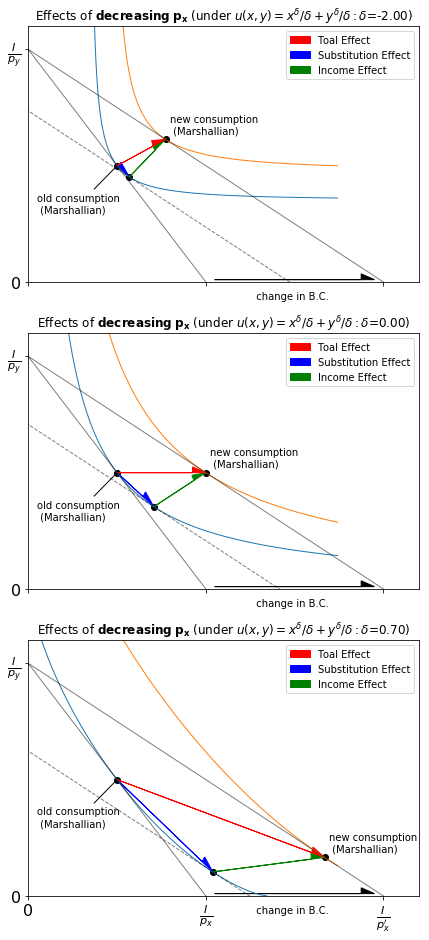

In [16]:
ann = 1

I = 12
py = 6
px_old = 6
px_new = 3
IoverPy = I/py
slp_old = px_old/py
slp_new = px_new/py

fig, axes = plt.subplots(3,1,figsize=(7, 16),
                         sharex= True, #sharing x axis properties such as xlim, xticks
                         sharey= True) #sharing y axis 

for dlt, ax in zip([-2, 0.00001, 0.7], axes): 
    plt.sca(ax)
    a= dlt
    b= dlt
    slp = slp_old
    x_old = fsolve(FOC_max3, np.array([float(0.1),float(1.5)] )) 
    slp = slp_new
    x_new = fsolve(FOC_max3, np.array([float(1),float(1)] )) 

    u_bar = utl3(x_old[0], x_old[1], a, b)
    x_comp = fsolve(FOC_min3, np.array([float(1),float(1)] )) 

    V3 = utl3(X1, X2, a, b)

    plt.xlim(0,1.1*IoverPy/slp_new)
    plt.ylim(0,1.1*IoverPy)
    plt.xticks([0, IoverPy/slp_old, IoverPy/slp_new ], ['0',r'$\frac{I}{p_x}$',  r'$\frac{I}{p_x^{\prime}}$'], fontsize=16, rotation=0)
    plt.yticks([0, IoverPy], ['0', r'$\frac{I}{p_y}$'], fontsize=16, rotation=0)
    #plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14)
    plt.title(r'Effects of ${\bf decreasing \: p_x}$ (under $u(x,y)= x^{\delta}/{\delta}+y^{\delta}/{\delta}$'+'$: \delta$={:02.2f})'.format(dlt))

    x_lev1 = np.array([x_old[0], x_new[0]])
    x_lev2 = np.array([x_old[1], x_new[1]])
    cnt = plt.contour(X1, X2, V3, levels = utl3(x_lev1, x_lev2, a, b), linewidths = 1, 
                colors = ['C0', 'C1'],
                linestyles='solid', 
                label = ['U_{old}', 'U_{new}'])

    plt.scatter(x_old[0], x_old[1], color = 'k', label = '$x_{old}$')
    plt.scatter(x_new[0], x_new[1], color = 'k', label = '$x_{new}$')
    plt.scatter(x_comp[0], x_comp[1], color = 'k', label = '$x_{comp}$')

    arr1=plt.arrow(x_old[0], x_old[1], x_comp[0] - x_old[0], x_comp[1] - x_old[1],
              head_width = 0.1, length_includes_head = True,shape = 'right',color = 'b')
    arr2 = plt.arrow(x_comp[0], x_comp[1], x_new[0] - x_comp[0], x_new[1] - x_comp[1], 
              head_width = 0.1, length_includes_head = True,shape = 'right',color = 'g')
    arr3 = plt.arrow(x_old[0], x_old[1], x_new[0] - x_old[0], x_new[1] - x_old[1], 
              head_width = 0.1, length_includes_head = True,shape = 'right',color = 'r')
    arr4 = plt.arrow(IoverPy/slp_old + 0.1, 0.02, IoverPy/slp_new -IoverPy/slp_old - 0.2, 0, 
              head_width = 0.1, length_includes_head = True,shape = 'right',color = 'k')
    plt.text( IoverPy/slp_old + 0.5, -0.15, '  change in B.C.')
    if (ann ==1): 
        plt.annotate('new consumption \n (Marshallian)', x_new + 0.05)
        plt.annotate('old consumption \n (Marshallian)', x_old, xytext = x_old - [0.9, 0.4], arrowprops=dict(arrowstyle='-'))
        #plt.annotate('Hicksian to keep the old utility level \n under the new prices', x_comp, xytext = x_comp - [1.2, 0.6], arrowprops=dict(arrowstyle='-'))



    for x_tan, slp, col, lnstl in zip([x_old,x_new, x_comp], [slp_old, slp_new, slp_new], ['k', 'k', 'k'], ['solid','solid','dashed']):
        tempx = np.arange(x_tan[0]-5, x_tan[0] + 5, 0.01)
        tempy = -slp*tempx + x_tan[1] + x_tan[0]*slp
        plt.plot(tempx, tempy, linestyle = lnstl, linewidth = 1,color = col, alpha = 0.5)

    plt.legend([arr3, arr1, arr2], ['Toal Effect', 'Substitution Effect','Income Effect']);
fig.savefig('effects of a decreasing price under CES.png')

In the above picture, I showed the effects of decreases in $p_x$. In order to see the relationship between $p_x$ and $y$, you might find it easier to see the relationship when I increase $p_x$. So, I plot such price changes in the following.

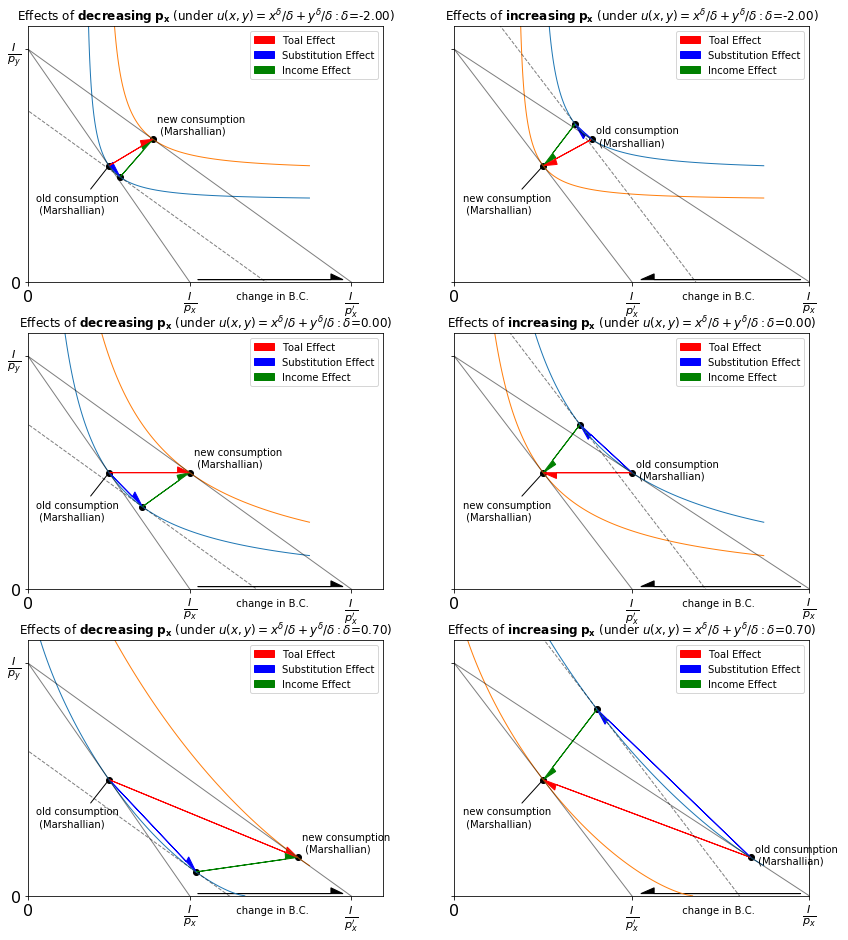

In [14]:
ann = 1

fig, axes = plt.subplots(3,2,figsize=(14, 16),
#                         sharex= True, #sharing x axis properties such as xlim, xticks
                        sharey= True) #sharing y axis 

for dec_px in [1,0]:
    I = 12
    py = 6
    if dec_px == 1:
        px_old = 6
        px_new = 3
    else:
        px_old = 3
        px_new = 6
    IoverPy = I/py
    slp_old = px_old/py
    slp_new = px_new/py


    for dlt, ax in zip([-2, 0.00001, 0.7], axes[:,1-dec_px]): 
        plt.sca(ax)
        a= dlt
        b= dlt
        slp = slp_old
        x_old = fsolve(FOC_max3, np.array([float(0.1),float(1.5)] )) 
        slp = slp_new
        x_new = fsolve(FOC_max3, np.array([float(1),float(1)] )) 

        u_bar = utl3(x_old[0], x_old[1], a, b)
        x_comp = fsolve(FOC_min3, np.array([float(1),float(1)] )) 

        V3 = utl3(X1, X2, a, b)

        plt.xlim(0,1.1*IoverPy/slp_new)
        plt.ylim(0,1.1*IoverPy)
        plt.xticks([0, IoverPy/slp_old, IoverPy/slp_new ], ['0',r'$\frac{I}{p_x}$',  r'$\frac{I}{p_x^{\prime}}$'], fontsize=16, rotation=0)
        plt.yticks([0, IoverPy], ['0', r'$\frac{I}{p_y}$'], fontsize=16, rotation=0)
        if dec_px == 1:
            plt.title(r'Effects of ${\bf decreasing \: p_x}$ (under $u(x,y)= x^{\delta}/{\delta}+y^{\delta}/{\delta}$'+'$: \delta$={:02.2f})'.format(dlt))
            x_lev1 = np.array([x_old[0], x_new[0]])
            x_lev2 = np.array([x_old[1], x_new[1]])
            cnt = plt.contour(X1, X2, V3, levels = utl3(x_lev1, x_lev2, a, b), linewidths = 1, 
                    colors = ['C0', 'C1'],
                    linestyles='solid', 
                    label = ['U_{old}', 'U_{new}'])
        else:            
            plt.title(r'Effects of ${\bf increasing \: p_x}$ (under $u(x,y)= x^{\delta}/{\delta}+y^{\delta}/{\delta}$'+'$: \delta$={:02.2f})'.format(dlt))
            x_lev1 = np.array([x_new[0], x_old[0]])
            x_lev2 = np.array([x_new[1], x_old[1]])
            cnt = plt.contour(X1, X2, V3, levels = utl3(x_lev1, x_lev2, a, b), linewidths = 1, 
                    colors = ['C1', 'C0'],
                    linestyles='solid', 
                    label = ['U_{new}', 'U_{old}'])

        

        plt.scatter(x_old[0], x_old[1], color = 'k', label = '$x_{old}$')
        plt.scatter(x_new[0], x_new[1], color = 'k', label = '$x_{new}$')
        plt.scatter(x_comp[0], x_comp[1], color = 'k', label = '$x_{comp}$')

        arr1=plt.arrow(x_old[0], x_old[1], x_comp[0] - x_old[0], x_comp[1] - x_old[1],
                  head_width = 0.1, length_includes_head = True,shape = 'right',color = 'b')
        arr2 = plt.arrow(x_comp[0], x_comp[1], x_new[0] - x_comp[0], x_new[1] - x_comp[1], 
                  head_width = 0.1, length_includes_head = True,shape = 'right',color = 'g')
        arr3 = plt.arrow(x_old[0], x_old[1], x_new[0] - x_old[0], x_new[1] - x_old[1], 
                  head_width = 0.1, length_includes_head = True,shape = 'right',color = 'r')
        if dec_px == 1: 
            arr4 = plt.arrow(IoverPy/slp_old + 0.1, 0.02, IoverPy/slp_new -IoverPy/slp_old - 0.2, 0, 
                      head_width = 0.1, length_includes_head = True,shape = 'right',color = 'k')
            plt.text( IoverPy/slp_old + 0.5, -0.15, '  change in B.C.')
        else:
            arr4 = plt.arrow(IoverPy/slp_old - 0.1, 0.02, IoverPy/slp_new -IoverPy/slp_old + 0.2, 0, 
                      head_width = 0.1, length_includes_head = True,shape = 'left',color = 'k')
            plt.text( IoverPy/slp_new + 0.5, -0.15, '  change in B.C.')

        if (ann ==1 and dec_px ==1): 
            plt.annotate('new consumption \n (Marshallian)', x_new + 0.05)
            plt.annotate('old consumption \n (Marshallian)', x_old, xytext = x_old - [0.9, 0.4], arrowprops=dict(arrowstyle='-'))
            #plt.annotate('Hicksian to keep the old utility level \n under the new prices', x_comp, xytext = x_comp - [1.2, 0.6], arrowprops=dict(arrowstyle='-'))
        if (ann ==1 and dec_px ==0):
            plt.annotate('old consumption \n (Marshallian)', x_old + [0.05, -0.05])
            plt.annotate('new consumption \n (Marshallian)', x_new, xytext = x_new - [0.9, 0.4], arrowprops=dict(arrowstyle='-'))
            #plt.annotate('Hicksian to keep the old utility level \n under the new prices', x_comp + 0.05)


        for x_tan, slp, col, lnstl in zip([x_old,x_new, x_comp], [slp_old, slp_new, slp_new], ['k', 'k', 'k'], ['solid','solid','dashed']):
            tempx = np.arange(x_tan[0]-5, x_tan[0] + 5, 0.01)
            tempy = -slp*tempx + x_tan[1] + x_tan[0]*slp
            plt.plot(tempx, tempy, linestyle = lnstl, linewidth = 1,color = col, alpha = 0.5)

        plt.legend([arr3, arr1, arr2], ['Toal Effect', 'Substitution Effect','Income Effect']);

fig.savefig('effects of price changes under CES.png')